Look at fpdock + ddG with smbit peptides.    

In [10]:
from os import listdir
import pandas as pd
import numpy as np

In [38]:
dirp = './decoys/'
files = listdir(dirp)

print(len(files))
data_files = []
for file in files:
    if ".json" in file:
        data_files.append(file)
print(len(data_files))

431
430


In [39]:
kds = {'peptide86':0.7E-9,
           'peptide78':3.4E-9,
           'peptide79':8.5E-9,
           'peptide99':1.8E-7,
           'peptide128':2.8E-7,
           'native_test':0.9E-6,
           'peptide104':1.3E-6,
           'peptide101':2.5E-6,
           'peptide114':1.9E-4
           }

frames = []
for file in data_files:
    df = pd.read_json(dirp+file, orient='records', lines=True)
    peptide = file.split('.')[0]
    df['peptide'] = peptide
    df['kd'] = kds[peptide]
    frames.append(df)
data = pd.concat(frames)

In [40]:
data.head()

,binding energy,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,...,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,total_score,peptide,kd
0,-23.095627,-946.489433,245.174269,529.017442,423.031642,34.861123,-17.695483,-274.102018,1.159472,-32.474634,...,0,94.780421,323.393535,-58.793703,0.018661,80.31913,15.458683,-363.449835,peptide128,2.800000e-07
0,-22.074179,-946.319353,249.148190,530.639494,424.711815,34.462655,-17.357351,-273.821223,1.163170,-32.474634,...,0,91.777244,322.552987,-59.213255,0.021359,80.31913,14.165313,-359.747393,peptide128,2.800000e-07
0,-23.389000,-943.553390,236.373064,521.087725,425.673924,34.161457,-18.346320,-265.904504,1.192466,-32.474634,...,0,94.816739,331.223937,-59.087886,0.032890,78.30918,12.310559,-364.344143,peptide114,1.900000e-04
0,-22.309374,-940.519573,224.959646,525.110759,421.310329,33.744172,-16.665057,-277.061981,1.090344,-32.474634,...,0,90.629954,325.213066,-59.047421,0.497884,78.30918,15.793569,-378.292680,peptide114,1.900000e-04
0,-23.425291,-944.277380,236.850744,529.353360,411.911819,33.397505,-17.028918,-276.873457,1.120203,-32.474634,...,0,93.309750,319.759603,-59.232094,0.034304,80.61524,13.148271,-373.982935,peptide86,7.000000e-10


In [45]:
peptides = set(data['peptide'])
tops = []
for peptide in peptides:
    p = data[data['peptide']==peptide]
    p = p.sort_values(by='total_score')
    t = p[:5]
    tops.append(t)
data_top10 = pd.concat(tops)

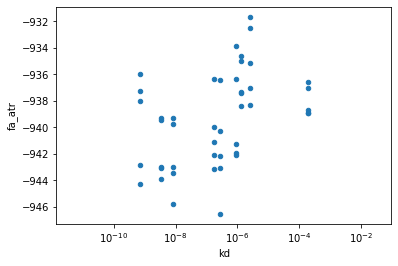

In [51]:
import seaborn as sn
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,5))
#sn.scatter(x='kd', y='ddG', data=data_top10)
data_top10.plot(x='kd', y='fa_atr', kind='scatter', logx=True)

In [50]:
data_top10.corr("pearson")['kd']

binding energy         1.250552e-01
fa_atr                 1.471829e-01
fa_rep                -2.386922e-01
fa_sol                -4.528301e-01
fa_intra_rep          -7.405446e-02
fa_intra_sol_xover4   -1.787019e-01
lk_ball_wtd           -3.693166e-01
fa_elec                3.003653e-01
pro_close             -1.079546e-01
hbond_sr_bb           -5.313539e-17
hbond_lr_bb            2.377606e-01
hbond_bb_sc            1.280422e-01
hbond_sc               4.204131e-02
dslf_fa13                       NaN
omega                 -2.398478e-01
fa_dun                -1.062419e-01
p_aa_pp                4.870899e-02
yhh_planarity          2.979279e-01
ref                   -3.876840e-02
rama_prepro            7.744081e-02
total_score           -1.646844e-01
kd                     1.000000e+00
Name: kd, dtype: float64

Looks like there is a correlation but it's not great. I think this would be improved if we fpdock on the WT and found that dG first, then plug that in to all the runs (or subtract them afterward). This would save a lot of computational time as well. **So rewrite ddG as just dG, eliminating the need for a WT pose as well.**

That didn't work. It's more or less the same. I guess binding energy doesn't really tell us much. Do we need to be recording the ```total_score``` immediately after ```fpdock``` does this change a lot after the dG calc? What are the numbers like when there is a reference structure given to ```fpdock```? How is that done?